In [2]:
from pathlib import Path
from glob import glob
from itertools import cycle

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import MultipleLocator
from scipy.interpolate import make_interp_spline, BSpline

# interactive plots
%matplotlib widget

import matrix_r  # module to calculate of matriz distance
import functions  # module with all the individuals function to do analysis
import distance_matrix
import atoms_index_list
import histogram

In [3]:
working_dir: Path = Path("/home/edison/repositories/radial_distribution/zora_so")

if not working_dir.exists():
    working_dir.mkdir()


In [4]:
dir_water: Path = Path(
    "/home/edison/repositories/radial_distribution/files_xyz/others/water"
)

files_ice: list = glob(str(dir_water / "ice_ih" / "w_iceih.xyz"))
files_water4: list = glob(str(dir_water / "w4" / "w*.xyz"))
files_water5: list = glob(str(dir_water / "w5" / "w*.xyz"))
files_water6: list = glob(str(dir_water / "w6" / "w*.xyz"))
# files_water7: list = glob(str(dir_water / "w7" / "w*.xyz"))
files_water7: list = glob(str(dir_water / "w*" / "w*.xyz"))

coordinates_ice: list = functions.dict_coordinates_xyz(files_ice)
coordinates_water4: list = functions.dict_coordinates_xyz(files_water4)
coordinates_water5: list = functions.dict_coordinates_xyz(files_water5)
coordinates_water6: list = functions.dict_coordinates_xyz(files_water6)
coordinates_water7: list = functions.dict_coordinates_xyz(files_water7)


files_w1: list = glob(str(working_dir / "w1s*.xyz"))
files_w2: list = glob(str(working_dir / "w2s*.xyz"))
files_w3: list = glob(str(working_dir / "w3s*.xyz"))
files_w4: list = glob(str(working_dir / "w4s*.xyz"))
files_w5: list = glob(str(working_dir / "w5s*.xyz"))
files_w6: list = glob(str(working_dir / "w6s*.xyz"))

coordinates_w1: dict = functions.dict_coordinates_xyz(files_w1)
coordinates_w2: dict = functions.dict_coordinates_xyz(files_w2)
coordinates_w3: dict = functions.dict_coordinates_xyz(files_w3)
coordinates_w4: dict = functions.dict_coordinates_xyz(files_w4)
coordinates_w5: dict = functions.dict_coordinates_xyz(files_w5)
coordinates_w6: dict = functions.dict_coordinates_xyz(files_w6)

coordinates_w1


{'/home/edison/repositories/radial_distribution/zora_so/w1s1.xyz':   element  x-coordinate  y-coordinate  z-coordinate
 0      Hg     -0.225130      0.010739       0.00000
 1       O      1.821376     -0.090165       0.00000
 2       H      2.325945      0.187310       0.79892
 3       H      2.325945      0.177310      -0.79892}

In [5]:
distances_dict_ice: dict = distance_matrix.distance_matrix(coordinates_ice, (0, 0, 0))
distances_dict_water4: dict = distance_matrix.distance_matrix(
    coordinates_water4, (0, 0, 0)
)
distances_dict_water5: dict = distance_matrix.distance_matrix(
    coordinates_water5, (0, 0, 0)
)
distances_dict_water6: dict = distance_matrix.distance_matrix(
    coordinates_water6, (0, 0, 0)
)
distances_dict_water7: dict = distance_matrix.distance_matrix(
    coordinates_water7, (0, 0, 0)
)

distances_dict_w1: dict = distance_matrix.distance_matrix(coordinates_w1, (0, 0, 0))
distances_dict_w2: dict = distance_matrix.distance_matrix(coordinates_w2, (0, 0, 0))
distances_dict_w3: dict = distance_matrix.distance_matrix(coordinates_w3, (0, 0, 0))
distances_dict_w4: dict = distance_matrix.distance_matrix(coordinates_w4, (0, 0, 0))
distances_dict_w5: dict = distance_matrix.distance_matrix(coordinates_w5, (0, 0, 0))
distances_dict_w6: dict = distance_matrix.distance_matrix(coordinates_w6, (0, 0, 0))

distances_dict_w1


{'/home/edison/repositories/radial_distribution/zora_so/w1s1.xyz':   atoms         0         1         2         3
 0    Hg  0.000000  2.048992  2.679073  2.678433
 1     O  2.048992  0.000000  0.984812  0.982042
 2     H  2.679073  0.984812  0.000000  1.597871
 3     H  2.678433  0.982042  1.597871  0.000000}

In [6]:
grid = (0.8, 3.5, 0.05)

# - number of bins for the accurences
rmin, rmax, dr = grid
nbins = int((rmax - rmin) / dr)


In [7]:
atoms_list: list = ["O", "H"]

atoms_index_dict_ice: dict = atoms_index_list.atoms_index_dict(
    distances_dict_ice, atoms_list, grid
)
atoms_index_dict_water4: dict = atoms_index_list.atoms_index_dict(
    distances_dict_water4, atoms_list, grid
)
atoms_index_dict_water5: dict = atoms_index_list.atoms_index_dict(
    distances_dict_water5, atoms_list, grid
)
atoms_index_dict_water6: dict = atoms_index_list.atoms_index_dict(
    distances_dict_water6, atoms_list, grid
)
atoms_index_dict_water7: dict = atoms_index_list.atoms_index_dict(
    distances_dict_water7, atoms_list, grid
)

atoms_index_dict_w1: dict = atoms_index_list.atoms_index_dict(
    distances_dict_w1, atoms_list, grid
)
atoms_index_dict_w2: dict = atoms_index_list.atoms_index_dict(
    distances_dict_w2, atoms_list, grid
)
atoms_index_dict_w3: dict = atoms_index_list.atoms_index_dict(
    distances_dict_w3, atoms_list, grid
)
atoms_index_dict_w4: dict = atoms_index_list.atoms_index_dict(
    distances_dict_w4, atoms_list, grid
)
atoms_index_dict_w5: dict = atoms_index_list.atoms_index_dict(
    distances_dict_w5, atoms_list, grid
)
atoms_index_dict_w6: dict = atoms_index_list.atoms_index_dict(
    distances_dict_w6, atoms_list, grid
)

atoms_index_dict_w2


{'/home/edison/repositories/radial_distribution/zora_so/w2s1.xyz': [(1, 2),
  (1, 3),
  (4, 5),
  (4, 6)]}

In [8]:
# - radial (bond) distribution analysis (RDA); i.e., atoms_list_AB = [A, B]
histogram_ice: np.array = histogram.rda(
    atoms_index_dict_ice, distances_dict_ice, grid, nbins
)
histogram_water4: np.array = histogram.rda(
    atoms_index_dict_water4, distances_dict_water4, grid, nbins
)
histogram_water5: np.array = histogram.rda(
    atoms_index_dict_water5, distances_dict_water5, grid, nbins
)
histogram_water6: np.array = histogram.rda(
    atoms_index_dict_water6, distances_dict_water6, grid, nbins
)
histogram_water7: np.array = histogram.rda(
    atoms_index_dict_water7, distances_dict_water7, grid, nbins
)

histogram_w1: np.array = histogram.rda(
    atoms_index_dict_w1, distances_dict_w1, grid, nbins
)
histogram_w2: np.array = histogram.rda(
    atoms_index_dict_w2, distances_dict_w2, grid, nbins
)
histogram_w3: np.array = histogram.rda(
    atoms_index_dict_w3, distances_dict_w3, grid, nbins
)
histogram_w4: np.array = histogram.rda(
    atoms_index_dict_w4, distances_dict_w4, grid, nbins
)
histogram_w5: np.array = histogram.rda(
    atoms_index_dict_w5, distances_dict_w5, grid, nbins
)
histogram_w6: np.array = histogram.rda(
    atoms_index_dict_w6, distances_dict_w6, grid, nbins
)

histogram_water7


array([  0,   0,   0, 578, 426,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   1,  12,  55, 114,  74,  65,  92,  78,  42,  29,
        22,   8,   9,   3,   4,   0,   1,   1,   1,   2,   2,   5,   6,
        23,  76,  59,  57,  31,  56, 115, 146, 164, 172, 161, 165, 212,
       189, 166])

In [9]:
# - saving histogram
distribution = np.linspace(rmin, rmax, nbins, endpoint=False)

histograms: list = [
    histogram_ice,
    histogram_water4,
    histogram_water5,
    histogram_water6,
    histogram_water7,
    histogram_w1,
    histogram_w2,
    histogram_w3,
    histogram_w4,
    histogram_w5,
    histogram_w6,
]

for count, hist in enumerate(histograms):
    histogram_name = working_dir / (
        f"rda_w{count + 1}_" + "-".join(atoms_list) + ".dat"
    )
    np.savetxt(
        histogram_name,
        np.transpose([distribution, hist]),
        delimiter=" ",
        header=f"distance [Angstrom]   occurrence (total={sum(hist)})",
        fmt="%.6f %28i",
    )


In [10]:
histogram_ice_nan = histogram_ice.astype("float")
histogram_water4_nan = histogram_water4.astype("float")
histogram_water5_nan = histogram_water5.astype("float")
histogram_water6_nan = histogram_water6.astype("float")
histogram_water7_nan = histogram_water7.astype("float")

histogram_w1_nan = histogram_w1.astype("float")
histogram_w2_nan = histogram_w2.astype("float")
histogram_w3_nan = histogram_w3.astype("float")
histogram_w4_nan = histogram_w4.astype("float")
histogram_w5_nan = histogram_w5.astype("float")
histogram_w6_nan = histogram_w6.astype("float")

histogram_ice_nan[histogram_ice_nan == 0] = float("nan")
histogram_water4_nan[histogram_water4_nan == 0] = float("nan")
histogram_water5_nan[histogram_water5_nan == 0] = float("nan")
histogram_water6_nan[histogram_water6_nan == 0] = float("nan")
histogram_water7_nan[histogram_water7_nan == 0] = float("nan")

histogram_w1_nan[histogram_w1_nan == 0] = float("nan")
histogram_w2_nan[histogram_w2_nan == 0] = float("nan")
histogram_w3_nan[histogram_w3_nan == 0] = float("nan")
histogram_w4_nan[histogram_w4_nan == 0] = float("nan")
histogram_w5_nan[histogram_w5_nan == 0] = float("nan")
histogram_w6_nan[histogram_w6_nan == 0] = float("nan")


In [11]:
grid_all = (0.9, 2.5, 0.1)

# - number of bins for the accurences
rmin_all, rmax_all, dr_all = grid_all
nbins_all = int((rmax_all - rmin_all) / dr_all)

distribution_all = np.linspace(rmin_all, rmax_all, nbins_all, endpoint=False)

files_all: list = glob(str(working_dir / "w*.xyz"))
coordinates_all: dict = functions.dict_coordinates_xyz(files_all)
distances_dict_all: dict = distance_matrix.distance_matrix(coordinates_all, (0, 0, 0))

atoms_index_dict_all: dict = atoms_index_list.atoms_index_dict(
    distances_dict_all, atoms_list, grid_all
)
histogram_all: np.array = histogram.rda(
    atoms_index_dict_all, distances_dict_all, grid_all, nbins_all
)


# -----------------------------------------------------------------------------------------------------------------------
from scipy.interpolate import make_interp_spline, BSpline

x = np.linspace(rmin_all, rmax_all, nbins_all, endpoint=False)
smooth_x = np.linspace(x[0], x[-1], len(x) * 100, endpoint=False)

y = histogram_all
smooth = make_interp_spline(x, y, k=3)
smooth_y = smooth(smooth_x)


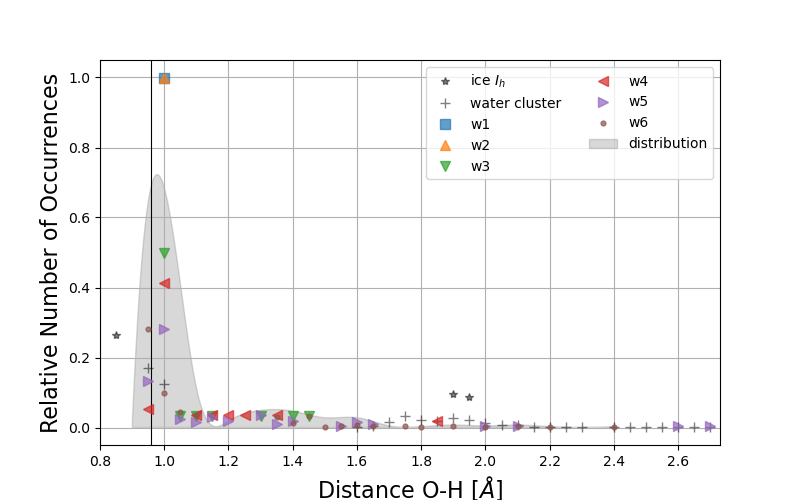

In [12]:
fig = plt.figure(figsize=(8, 5))

# ax = brokenaxes(ylims=((0, 0.25),(0.95, 1.05)), hspace=.2)
ax = fig.add_subplot(111)
ax.grid(b=True, which="major")

# - lines style in a for loop
# lines = ['-o', '-^', '-v', '-<', '->', '-s', '-d'] #, '-h', '-p', '-D', '-H']
lines = ["s", "^", "v", "<", ">", ".", "s", "d", "o"]  # , '-h', '-p', '-D', '-H']
# lines = ['-o', '-^', '-v', '-<', '->', '-s', '-+', '-x', '-d', '-1', '-2', '-3', '-4', '-h', '-p', '-|', '-_', '-D', '-H']
# lines = ["-","--","-.",":"]
linecycler = cycle(lines)

cm = cycle(
    [
        "#1f77b4",
        "#ff7f0e",
        "#2ca02c",
        "#d62728",
        "#9467bd",
        "#8c564b",
        "#e377c2",
        "#7f7f7f",
        "#bcbd22",
        "#17becf",
    ]
)


# ax.axhline(y=0, color='black', linestyle='-', linewidth=0.7)
ax.axvline(x=0.96, color="black", linestyle="-", linewidth=0.8)

total_ice = sum(histogram_ice)
total_water4 = sum(histogram_water4)
total_water5 = sum(histogram_water5)
total_water6 = sum(histogram_water6)
total_water7 = sum(histogram_water7)

total_w1 = sum(histogram_w1)
total_w2 = sum(histogram_w2)
total_w3 = sum(histogram_w3)
total_w4 = sum(histogram_w4)
total_w5 = sum(histogram_w5)
total_w6 = sum(histogram_w6)
total_all = sum(histogram_all)

plt.fill_between(
    smooth_x,
    smooth_y / total_all,
    where=(smooth_y / total_all > 0),
    alpha=0.3,
    color="gray",
    label="distribution",
)
# ax.plot(
#     # distribution_all,
#     # histogram_all / total_all,
#     smooth_x,
#     smooth_y / total_all,
#     "-",
#     # next(linecycler),
#     color="black",
#     label="distribution",
#     markersize=7,
#     alpha=0.7,
#     # color="black",
#     # markerfacecolor="none",
#     )
ax.plot(
    distribution,
    histogram_ice_nan / total_ice,
    "*",
    # next(linecycler),
    color="black",
    label=r"ice $I_h$",
    markersize=6,
    alpha=0.5,
    # color="black",
    # markerfacecolor="none",
)
# ax.plot(
#     distribution,
#     histogram_water4_nan / total_water4,
#     # "o",
#     next(linecycler),
#     color="b",
#     label="water tetramer",
#     markersize=7,
#     alpha=0.7,
#     # color="black",
#     # markerfacecolor="none",
#     )
# ax.plot(
#     distribution,
#     histogram_water5_nan / total_water5,
#     # "o",
#     next(linecycler),
#     color="b",
#     label="water pentamer",
#     markersize=7,
#     alpha=0.7,
#     # color="black",
#     # markerfacecolor="none",
#     )
# ax.plot(
#     distribution,
#     histogram_water6_nan / total_water6,
#     # "o",
#     next(linecycler),
#     color="b",
#     label="water hexamer",
#     markersize=7,
#     alpha=0.7,
#     # color="black",
#     # markerfacecolor="none",
#     )
ax.plot(
    distribution,
    histogram_water7_nan / total_water7,
    "+",
    # next(linecycler),
    color="black",
    label="water cluster",
    markersize=7,
    alpha=0.5,
    # color="black",
    # markerfacecolor="none",
)

ax.plot(
    distribution,
    histogram_w1_nan / total_w1,
    # "-",
    next(linecycler),
    color=next(cm),
    label="w1",
    markersize=7,
    alpha=0.7,
    # color="black",
    # markerfacecolor="none",
)
ax.plot(
    distribution,
    histogram_w2_nan / total_w2,
    # "-",
    next(linecycler),
    color=next(cm),
    label="w2",
    markersize=7,
    alpha=0.7,
    # color="black",
    # markerfacecolor="none",
)
ax.plot(
    distribution,
    histogram_w3_nan / total_w3,
    # "-",
    next(linecycler),
    color=next(cm),
    label="w3",
    markersize=7,
    alpha=0.7,
    # color="black",
    # markerfacecolor="none",
)
ax.plot(
    distribution,
    histogram_w4_nan / total_w4,
    # "-",
    next(linecycler),
    color=next(cm),
    label="w4",
    markersize=7,
    alpha=0.7,
    # color="black",
    # markerfacecolor="none",
)
ax.plot(
    distribution,
    histogram_w5_nan / total_w5,
    # "-",
    next(linecycler),
    color=next(cm),
    label="w5",
    markersize=7,
    alpha=0.7,
    # color="black",
    # markerfacecolor="none",
)
ax.plot(
    distribution,
    histogram_w6_nan / total_w6,
    # "-",
    next(linecycler),
    color=next(cm),
    label="w6",
    markersize=7,
    alpha=0.7,
    # color="black",
    # markerfacecolor="none",
)

plt.xlim(0.8, 2.73)
# plt.ylim(0.001, 1.1)

ax.xaxis.set_major_locator(MultipleLocator(0.2))

ax.set_ylabel("Relative Number of Occurrences", fontsize=16)
ax.set_xlabel(f'Distance {"-".join(atoms_list)}' r" [$\AA$]", fontsize=16)
plt.legend(loc="best", fontsize=10, ncol=2)


fig.savefig(
    working_dir / "rda_OH.pdf",
    dpi=500,
    bbox_inches="tight",
)
